In [1]:
import matplotlib.pyplot as plt
import math, time
import sys
import random
import numpy as np
sys.path.append('gridworld-gym-master/')

import gym
import gym_partially_observable_grid
from functions_es_gridworld import *

In [2]:
seed_val=2
np.random.seed(seed_val)
random.seed(seed_val)

In [3]:
results1 = np.load('./results/algoperf3-4.npz', allow_pickle=True)
results2 = np.load('./results/algoperf3-9.npz', allow_pickle=True)

In [4]:
list(results1.keys())

['T',
 'A',
 'B',
 'tau',
 'world_to_mimic',
 'new_world_name',
 'eps',
 'gamma',
 'alpha',
 'beta',
 'avg_over',
 'num_init_vals',
 'num_true_vals',
 'theta_init_all',
 'results_all',
 'theta_hat_t_all',
 'theta_hat_mean_all',
 'theta_star_all']

In [5]:
list(results2.keys())

['T',
 'A',
 'B',
 'tau',
 'world_to_mimic',
 'new_world_name',
 'eps',
 'gamma',
 'alpha',
 'beta',
 'avg_over',
 'num_init_vals',
 'num_true_vals',
 'theta_init_all',
 'results_all',
 'theta_hat_t_all',
 'theta_hat_mean_all',
 'theta_star_all']

In [6]:
T = results1['T']
theta_star_all = results1['theta_star_all']
num_init_vals = results1['num_init_vals']
num_true_vals = results1['num_true_vals']
avg_over = results1['avg_over']

In [7]:
theta_hat_t_all1 = results1['theta_hat_t_all']
theta_hat_t_all2 = results2['theta_hat_t_all']

In [8]:
theta_star_all

array([0.001     , 0.11188889, 0.22277778, 0.33366667, 0.44455556,
       0.55544444, 0.66633333, 0.77722222, 0.88811111, 0.999     ])

In [9]:
theta_hat_t_all1.shape

(200000, 10, 10)

In [10]:
theta_hat_t_all = np.zeros(theta_hat_t_all1.shape)
for j in range(num_true_vals):
    if j<5:
        theta_hat_t_all[:,:,j] = theta_hat_t_all1[:,:,j]
    else:
        theta_hat_t_all[:,:,j] = theta_hat_t_all2[:,:,j]

In [11]:
# theta_hat_t_pravg = np.zeros(theta_hat_t_all.shape)
# for j in range(num_true_vals):
#     for i in range(num_init_vals):
#         for t in range(T):
#             # theta_hat_t_pravg[t, i,j] = np.mean(theta_hat_t_all[int(2*t/3):t+1, i, j])
#             if t>0:
#                 theta_hat_t_pravg[t, i,j] = theta_hat_t_pravg[t-1, i,j] + (1/t)*(theta_hat_t_all[t, i,j]-theta_hat_t_pravg[t-1, i,j])


In [12]:
theta_hat_t_pravg = np.zeros(theta_hat_t_all.shape)
for t in range(T):
    # theta_hat_t_pravg[t, i,j] = np.mean(theta_hat_t_all[int(2*t/3):t+1, i, j])
    if t>0:
        theta_hat_t_pravg[t, :,:] = theta_hat_t_pravg[t-1, :,:] + (1/t)*(theta_hat_t_all[t, :,:]-theta_hat_t_pravg[t-1, :,:])


In [13]:
theta_hat_mean_pravg = np.mean(theta_hat_t_pravg[-1,:,:], axis=0)

Text(0.5, 1.01, 'PR Averaging')

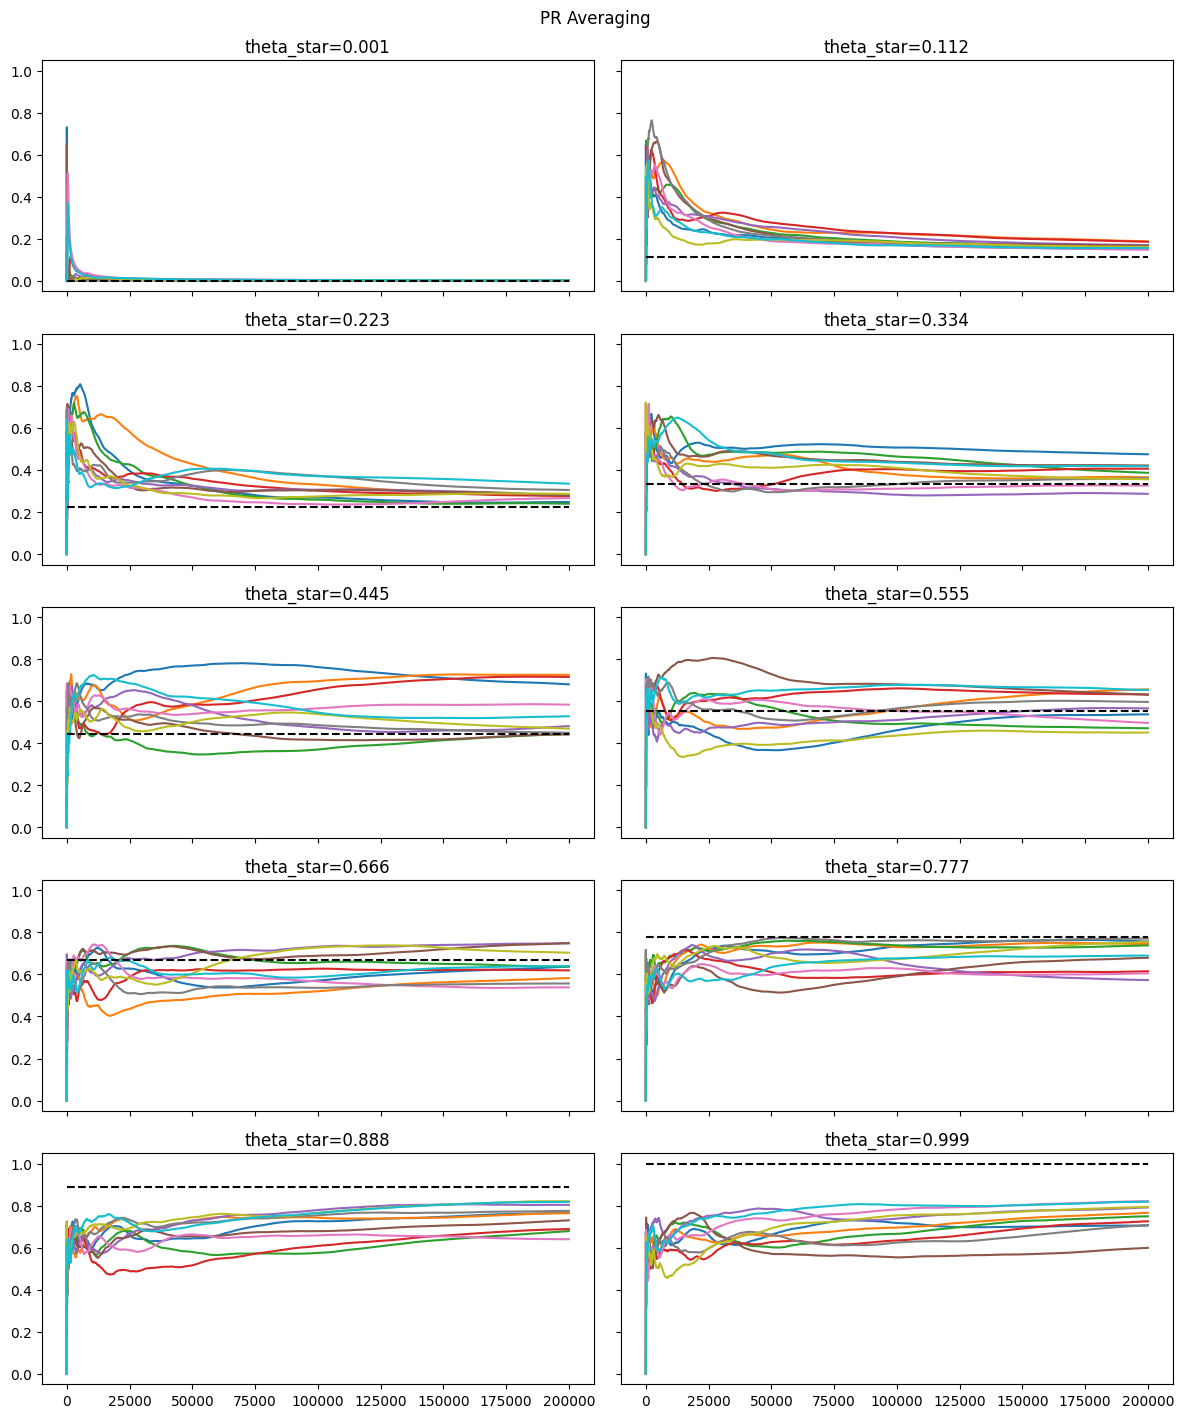

In [14]:
fig, ax = plt.subplots(5, 2, squeeze=True, figsize=(12,14), sharex=True, sharey=True)

for k in range(num_true_vals):
    for i in range(num_init_vals):
        ax[k//2, k%2].plot(theta_hat_t_pravg[:,i,k])
    ax[k//2, k%2].hlines(theta_star_all[k], 0, T, linestyles='dashed', colors='k')
    ax[k//2, k%2].set_title(f"theta_star={round(theta_star_all[k], 3)}")
plt.tight_layout()
fig.suptitle("PR Averaging", y=1.01)

In [15]:
theta_hat_t_pravg.shape

(200000, 10, 10)

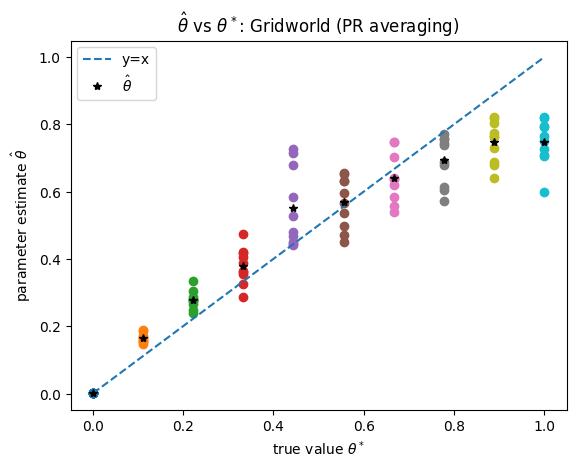

In [16]:
for j in range(num_true_vals):
    plt.scatter([theta_star_all[j] for _ in range(num_init_vals)], theta_hat_t_pravg[-1,:,j], )
plt.plot(theta_star_all, theta_star_all, '--', label="y=x")
plt.plot(theta_star_all, theta_hat_mean_pravg, 'k*', label=r"$\hat{\theta}$")
plt.xlabel(r"true value $\theta^*$")
# plt.vlines(dep_rate, 0, 1, linestyles='dashed', label="dep_rate", colors='gray')
plt.ylabel(r"parameter estimate $\hat{\theta}$")
plt.title(r"$\hat{\theta}$ vs $\theta^*$: Gridworld (PR averaging)")
plt.legend()

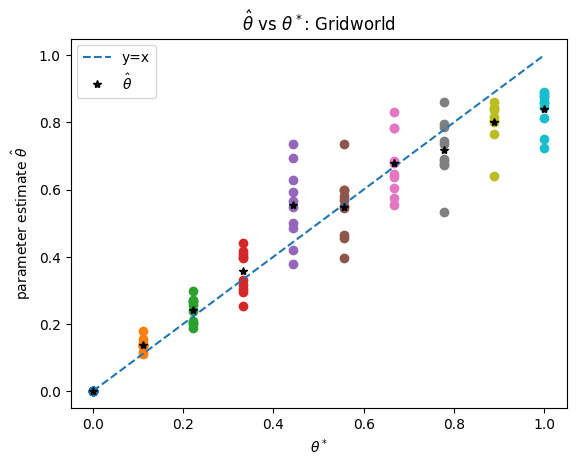

In [17]:
for j in range(num_true_vals):
    plt.scatter([theta_star_all[j] for _ in range(num_init_vals)], np.mean(theta_hat_t_all[-avg_over:,:,j],axis=0) )
plt.plot(theta_star_all, theta_star_all, '--', label="y=x")
plt.plot(theta_star_all, np.mean( np.mean(theta_hat_t_all[-avg_over:,:,:],axis=0)  ,axis=0), 'k*', label=r"$\hat{\theta}$")
plt.xlabel(r"$\theta^*$")
# plt.vlines(dep_rate, 0, 1, linestyles='dashed', label="dep_rate", colors='gray')
plt.ylabel(r"parameter estimate $\hat{\theta}$")
plt.title(r"$\hat{\theta}$ vs $\theta^*$: Gridworld")
plt.legend()

In [18]:
theta_star_all

array([0.001     , 0.11188889, 0.22277778, 0.33366667, 0.44455556,
       0.55544444, 0.66633333, 0.77722222, 0.88811111, 0.999     ])

# One exemplary case

In [19]:
index_true = 2
index_init = 0
res_all = results1['results_all']

In [20]:
resA = res_all[index_true][index_init]

In [21]:
list(resA.keys())

['X',
 'O',
 'Z',
 'pi_t_all',
 'theta_hat_t',
 'omega_t',
 'p_theta',
 'theta_indices',
 'theta_not_indices',
 'env',
 'rule_new_details']

In [22]:
env = resA['env']

In [23]:
env.world

[['#', '#', '#', '#', '#', '#', '#', '#', '#'],
 ['#', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '#'],
 ['#', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '#'],
 ['#', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '#'],
 ['#', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '#'],
 ['#', ' ', ' ', ' ', ' ', ' ', 'G', ' ', '#'],
 ['#', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '#'],
 ['#', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '#'],
 ['#', '#', '#', '#', '#', '#', '#', '#', '#']]

In [24]:
grid = np.zeros((len(env.world), len(env.world[0])))

In [25]:
grid_temp = np.array(env.world)

In [26]:
grid_temp

array([['#', '#', '#', '#', '#', '#', '#', '#', '#'],
       ['#', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '#'],
       ['#', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '#'],
       ['#', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '#'],
       ['#', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '#'],
       ['#', ' ', ' ', ' ', ' ', ' ', 'G', ' ', '#'],
       ['#', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '#'],
       ['#', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '#'],
       ['#', '#', '#', '#', '#', '#', '#', '#', '#']], dtype='<U1')

In [27]:
grid[grid_temp=='#'] = -1

In [28]:
grid

array([[-1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.],
       [-1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.],
       [-1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.],
       [-1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.],
       [-1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.],
       [-1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.],
       [-1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1.]])

In [29]:
obs_temp = np.array(env.abstract_world)
grid_obs = np.zeros(grid.shape)
grid_obs[obs_temp=='#']=-1
grid_obs[obs_temp!='#'] = obs_temp[obs_temp!='#'].astype(np.float64)

In [30]:
grid_obs

array([[-1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1.,  1.,  1.,  5.,  5.,  2.,  2.,  2., -1.],
       [-1.,  1.,  1.,  5.,  5.,  2.,  7.,  7., -1.],
       [-1.,  1.,  1.,  9.,  9.,  2.,  7.,  7., -1.],
       [-1.,  3.,  3.,  9.,  9.,  9.,  4.,  4., -1.],
       [-1.,  3.,  3.,  3.,  6.,  6.,  4.,  4., -1.],
       [-1.,  3.,  8.,  8.,  6.,  6.,  4.,  4., -1.],
       [-1.,  3.,  8.,  8.,  6.,  4.,  4.,  4., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1.]])

In [31]:
from matplotlib.colors import ListedColormap
from matplotlib import colors
cmap = ListedColormap(['lightgray', 'cyan', 'tab:orange', 'forestgreen', 'tab:red', 'yellowgreen', 'tab:brown', \
                      'violet', 'gold', 'navy'])
bounds = [-1.5, 0 ]+[0.5+i for i in range(1,10)]
norm = colors.BoundaryNorm(bounds, cmap.N)

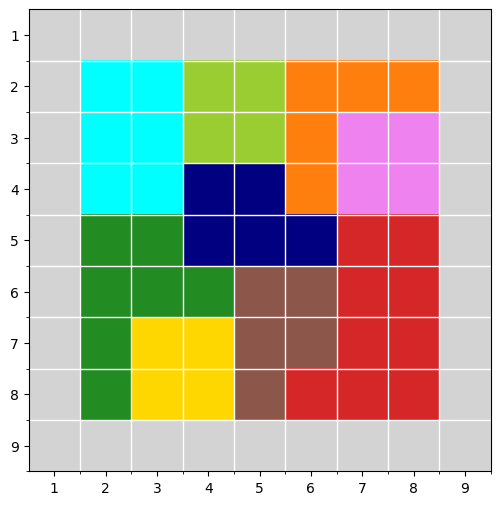

In [32]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(grid_obs, cmap=cmap, norm=norm, aspect='equal')
ax.set_xticks(ticks=np.arange(9), labels=np.arange(1,10))
ax.set_yticks(ticks=np.arange(9),labels=np.arange(1,10))

# plt.grid(True)
ax.set_xticks(np.arange(0.5, 9, 1), minor=True)
ax.set_yticks(np.arange(0.5, 9, 1), minor=True)

# Gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=1)
# plt.savefig('./figures/abstract_world.eps', dpi=300)

In [34]:
omegat = resA['omega_t']

(100000.0, 120000.0)

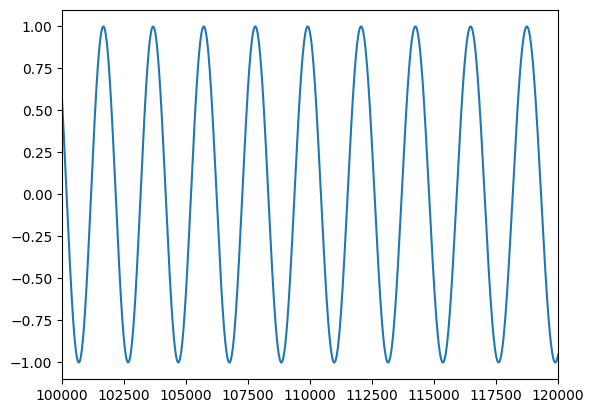

In [35]:
plt.plot(np.sin(omegat))
plt.xlim(100000, 120000)

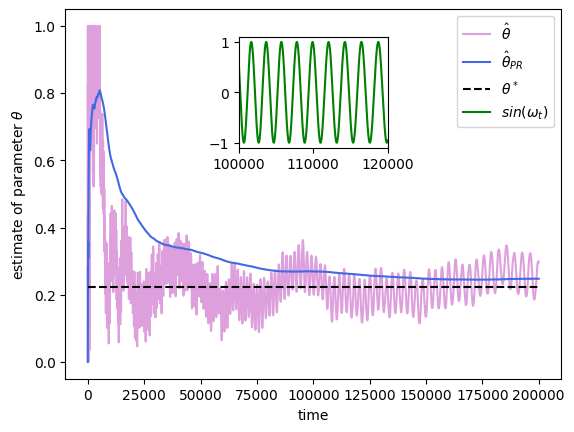

In [36]:
theta_hat_t = theta_hat_t_all[:,index_init,index_true]
theta_hat_pr_t = theta_hat_t_pravg[:,index_init, index_true]
fig, ax = plt.subplots()

ax.plot(theta_hat_t, 'plum', label=r'$\hat{\theta}$')
ax.plot(theta_hat_pr_t, 'royalblue', label=r'$\hat{\theta}_{PR}$ ')
ax.hlines(theta_star_all[index_true], 0, T, linestyles='dashed', colors='k', label=r'$\theta^*$')

ax.set_xlabel('time')
ax.set_ylabel(r'estimate of parameter $\theta$')

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
axin = inset_axes(ax, width="30%", height="30%", borderpad=2, loc="upper center")
axin.plot(np.sin(omegat), 'g', label=r'$sin(\omega_t)$')
axin.set_xlim(100000, 120000)
han_in, lab_in = axin.get_legend_handles_labels()

han, lab = ax.get_legend_handles_labels()

ax.legend(han+han_in, lab+lab_in)
# plt.savefig('./figures/gridworld_example_iterates.eps', dpi=300)

In [37]:
pi_t_all = resA['pi_t_all']
Xt_all = resA['X']

In [38]:
pi_t_all.shape

(9, 9, 200000)

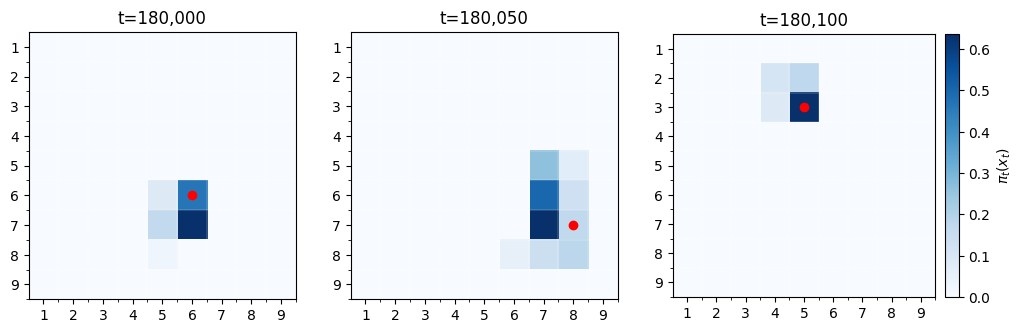

In [39]:
time_locs = [180000+50*i for i in range(3)]

fig, ax = plt.subplots(1, 3, figsize=(12,8), gridspec_kw={'width_ratios': [1, 1, 1.07]})

cmap_here = 'Blues'
x_color = 'r'
#1
ax[0].imshow(pi_t_all[:,:,time_locs[0]], cmap=cmap_here, origin='upper')
ax[0].set_xticks(ticks=np.arange(9), labels=np.arange(1,10))
ax[0].set_yticks(ticks=np.arange(9),labels=np.arange(1,10))

# plt.grid(True)
ax[0].set_xticks(np.arange(0.5, 9, 1), minor=True)
ax[0].set_yticks(np.arange(0.5, 9, 1), minor=True)

# Gridlines based on minor ticks
ax[0].grid(which='minor', color='w', linestyle='-', linewidth=0.2)
ax[0].scatter(Xt_all[time_locs[0]][1], Xt_all[time_locs[0]][0], c=x_color)
ax[0].set_title('t={:,}'.format(time_locs[0]))
#2
ax[1].imshow(pi_t_all[:,:,time_locs[1]], cmap=cmap_here, origin='upper')
ax[1].set_xticks(ticks=np.arange(9), labels=np.arange(1,10))
ax[1].set_yticks(ticks=np.arange(9),labels=np.arange(1,10))

# plt.grid(True)
ax[1].set_xticks(np.arange(0.5, 9, 1), minor=True)
ax[1].set_yticks(np.arange(0.5, 9, 1), minor=True)

# Gridlines based on minor ticks
ax[1].grid(which='minor', color='w', linestyle='-', linewidth=0.2)
ax[1].scatter(Xt_all[time_locs[1]][1], Xt_all[time_locs[1]][0], c=x_color)
ax[1].set_title('t={:,}'.format(time_locs[1]))
#3
im = ax[2].imshow(pi_t_all[:,:,time_locs[2]], cmap=cmap_here, origin='upper')
ax[2].set_xticks(ticks=np.arange(9), labels=np.arange(1,10))
ax[2].set_yticks(ticks=np.arange(9),labels=np.arange(1,10))

# plt.grid(True)
ax[2].set_xticks(np.arange(0.5, 9, 1), minor=True)
ax[2].set_yticks(np.arange(0.5, 9, 1), minor=True)

# Gridlines based on minor ticks
ax[2].grid(which='minor', color='w', linestyle='-', linewidth=0.2)
ax[2].scatter(Xt_all[time_locs[2]][1], Xt_all[time_locs[2]][0], c=x_color)
ax[2].set_title('t={:,}'.format(time_locs[2]))
# ax.set_colorbar()

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax[2])
cax = divider.append_axes('right', size='5%', pad=0.1)
fig.colorbar(im,cax=cax, label=r"$\pi_t(x_t)$")

# plt.savefig('./figures/gridworld_belief_state.eps', dpi=300)

# Algorithm Performance: multiple runs, $\theta^*$ values

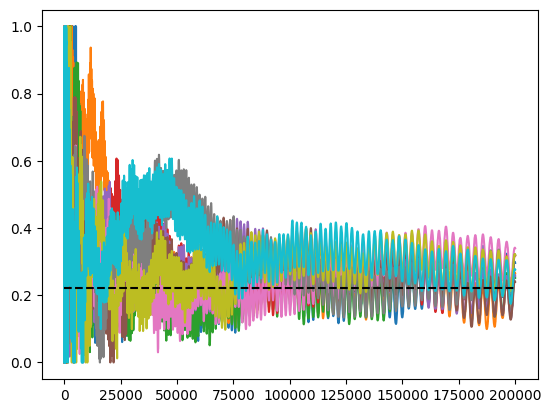

In [40]:
for i in range(num_init_vals):
    plt.plot(theta_hat_t_all[:,i,index_true])
plt.hlines(theta_star_all[index_true], 0, T, linestyles='dashed', colors='k', label=r'$\theta^*$')

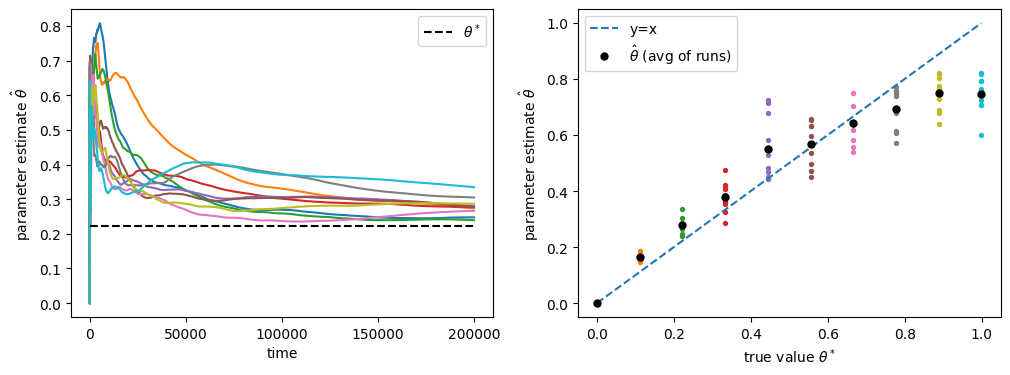

In [41]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

for i in range(num_init_vals):
    ax[0].plot(theta_hat_t_pravg[:,i,index_true])
ax[0].hlines(theta_star_all[index_true], 0, T, linestyles='dashed', colors='k', label=r'$\theta^*$')
ax[0].set_xlabel('time')
ax[0].set_ylabel(r'parameter estimate $\hat{\theta}$')
ax[0].set_xticks(ticks=[50000*i for i in range(5)])
ax[0].legend()

for j in range(num_true_vals):
    ax[1].scatter([theta_star_all[j] for _ in range(num_init_vals)], theta_hat_t_pravg[-1,:,j], s=8)
# ax[1].scatter(theta_star_all, theta_hat_mean_pravg)
ax[1].plot(theta_star_all, theta_star_all, '--', label="y=x")
ax[1].plot(theta_star_all, theta_hat_mean_pravg, 'ko', markersize=5, label=r"$\hat{\theta}$ (avg of runs)")
ax[1].set_xlabel(r"true value $\theta^*$")
# plt.vlines(dep_rate, 0, 1, linestyles='dashed', label="dep_rate", colors='gray')
ax[1].set_ylabel(r"parameter estimate $\hat{\theta}$")
ax[1].legend()
# plt.savefig('./figures/gridworld_algo_performance.eps', dpi=300)

In [46]:
LL_landscape = np.zeros((num_init_vals,))
theta_vals = np.linspace(1e-3, 1-1e-3, num=num_init_vals)
Ot_all = resA['O']
Zt_all = resA['Z']
rule_new_details = resA['rule_new_details']
ticL = time.perf_counter()
for i in range(num_init_vals):
    LL_landscape[i] = compute_log_likelihood_alldata(theta_estimate=theta_vals[i], O_t=Ot_all, \
                                                     Z_t=Zt_all, Tmax=T, env=env, \
                                                     rule_new_details=rule_new_details) #same new rule for all init conditions
    if (i+1)%(num_init_vals//5)==0:
        print(f"{i+1} done")
tocL = time.perf_counter()
print(f"Time taken={tocL-ticL}s")

2 done
4 done
6 done
8 done
10 done
Time taken=555.222773842s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


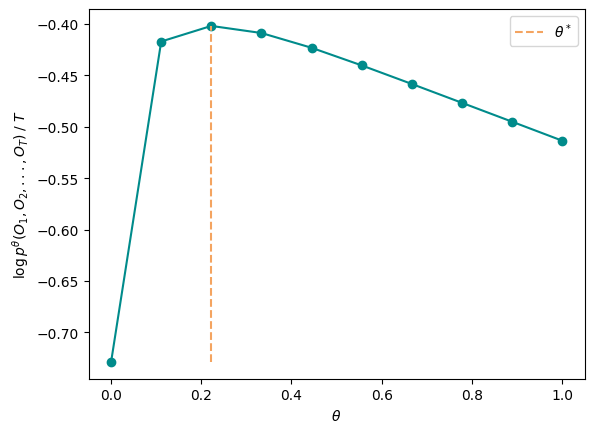

In [60]:
plt.plot(theta_vals, LL_landscape/T,color='darkcyan', marker='o',linestyle='-')
plt.vlines(theta_star_all[index_true], np.amin(LL_landscape/T), np.amax(LL_landscape/T), linestyles='dashed',\
           colors='sandybrown', label=r'$\theta^*$')
plt.legend()
plt.xlabel(r'$\theta$')
plt.ylabel(r"$\log p^{\theta}(O_1, O_2, ..., O_T)\; / \; T$")
# plt.savefig('./figures/gridworld-LL.eps', dpi=300)

/tmp/ipykernel_2787/4198045413.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


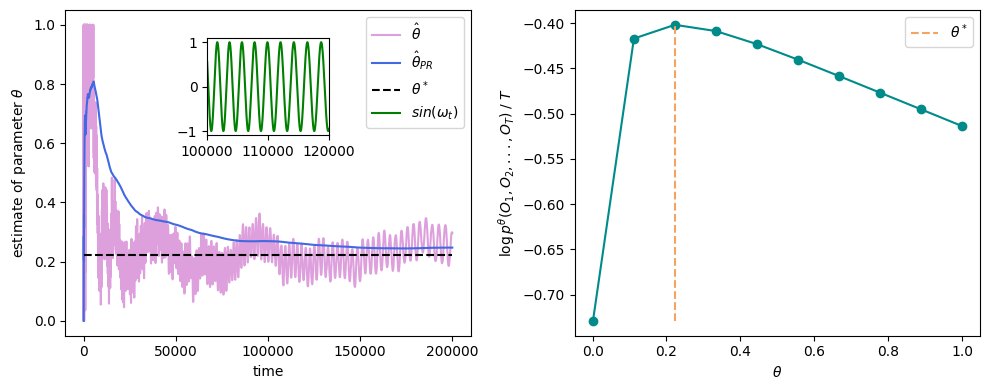

In [67]:
theta_hat_t = theta_hat_t_all[:,index_init,index_true]
theta_hat_pr_t = theta_hat_t_pravg[:,index_init, index_true]
fig, ax = plt.subplots(1,2, figsize=(10,4), squeeze=True)

ax[0].plot(theta_hat_t, 'plum', label=r'$\hat{\theta}$')
ax[0].plot(theta_hat_pr_t, 'royalblue', label=r'$\hat{\theta}_{PR}$ ')
ax[0].hlines(theta_star_all[index_true], 0, T, linestyles='dashed', colors='k', label=r'$\theta^*$')

ax[0].set_xlabel('time')
ax[0].set_ylabel(r'estimate of parameter $\theta$')
ax[0].set_xticks(ticks=[50000*i for i in range(5)])

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
axin = inset_axes(ax[0], width="30%", height="30%", borderpad=2, loc="upper center")
axin.plot(np.sin(omegat), 'g', label=r'$sin(\omega_t)$')
axin.set_xlim(100000, 120000)
han_in, lab_in = axin.get_legend_handles_labels()

han, lab = ax[0].get_legend_handles_labels()

ax[0].legend(han+han_in, lab+lab_in)

ax[1].plot(theta_vals, LL_landscape/T,color='darkcyan', marker='o',linestyle='-')
ax[1].vlines(theta_star_all[index_true], np.amin(LL_landscape/T), np.amax(LL_landscape/T), linestyles='dashed',\
           colors='sandybrown', label=r'$\theta^*$')
ax[1].legend()
ax[1].set_xlabel(r'$\theta$')
ax[1].set_ylabel(r"$\log p^{\theta}(O_1, O_2, ..., O_T)\; / \; T$")

plt.tight_layout()

# plt.savefig('./figures/gridworld_iterates_LL.eps', dpi=300)